In [27]:
# import the required libraries
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("balanced_preprocessed_data.csv")

In [29]:
df.head(1)

Air temperature  Process temperature  Rotational speed    Torque  \
0        -1.652411            -1.486592         -0.680851  0.837037   

   Tool wear     Power  temperature_differential  power_speed_ratio  \
0    1.30744  0.783909                  0.764706           1.153805   

   thermal_stress  operational_stress  efficiency_index  \
0        1.577556            0.436558          0.749894   

   temperature_stability  power_wear_interaction  speed_torque_efficiency  \
0              -1.378931                0.286994                -2.225271   

   wear_rate  Machine failure  
0   1.247291              0.0

dropping non-viable features

In [30]:
df.drop(['temperature_stability', 'Air temperature','wear_rate'], axis=1, inplace=True, errors='ignore')

In [31]:
df.head(1)

Process temperature  Rotational speed    Torque  Tool wear     Power  \
0            -1.486592         -0.680851  0.837037    1.30744  0.783909   

   temperature_differential  power_speed_ratio  thermal_stress  \
0                  0.764706           1.153805        1.577556   

   operational_stress  efficiency_index  power_wear_interaction  \
0            0.436558          0.749894                0.286994   

   speed_torque_efficiency  Machine failure  
0                -2.225271              0.0

In [32]:
# df.to_csv("db_cleaned_dropped_unneccesary.csv", index=False)

In [33]:
# List of columns to exclude from normalization and winsorization
excluded_columns = ['Type', 'Machine failure']

### Visualisations

Box Whisker Plots for all attributes compared to Machine Failure

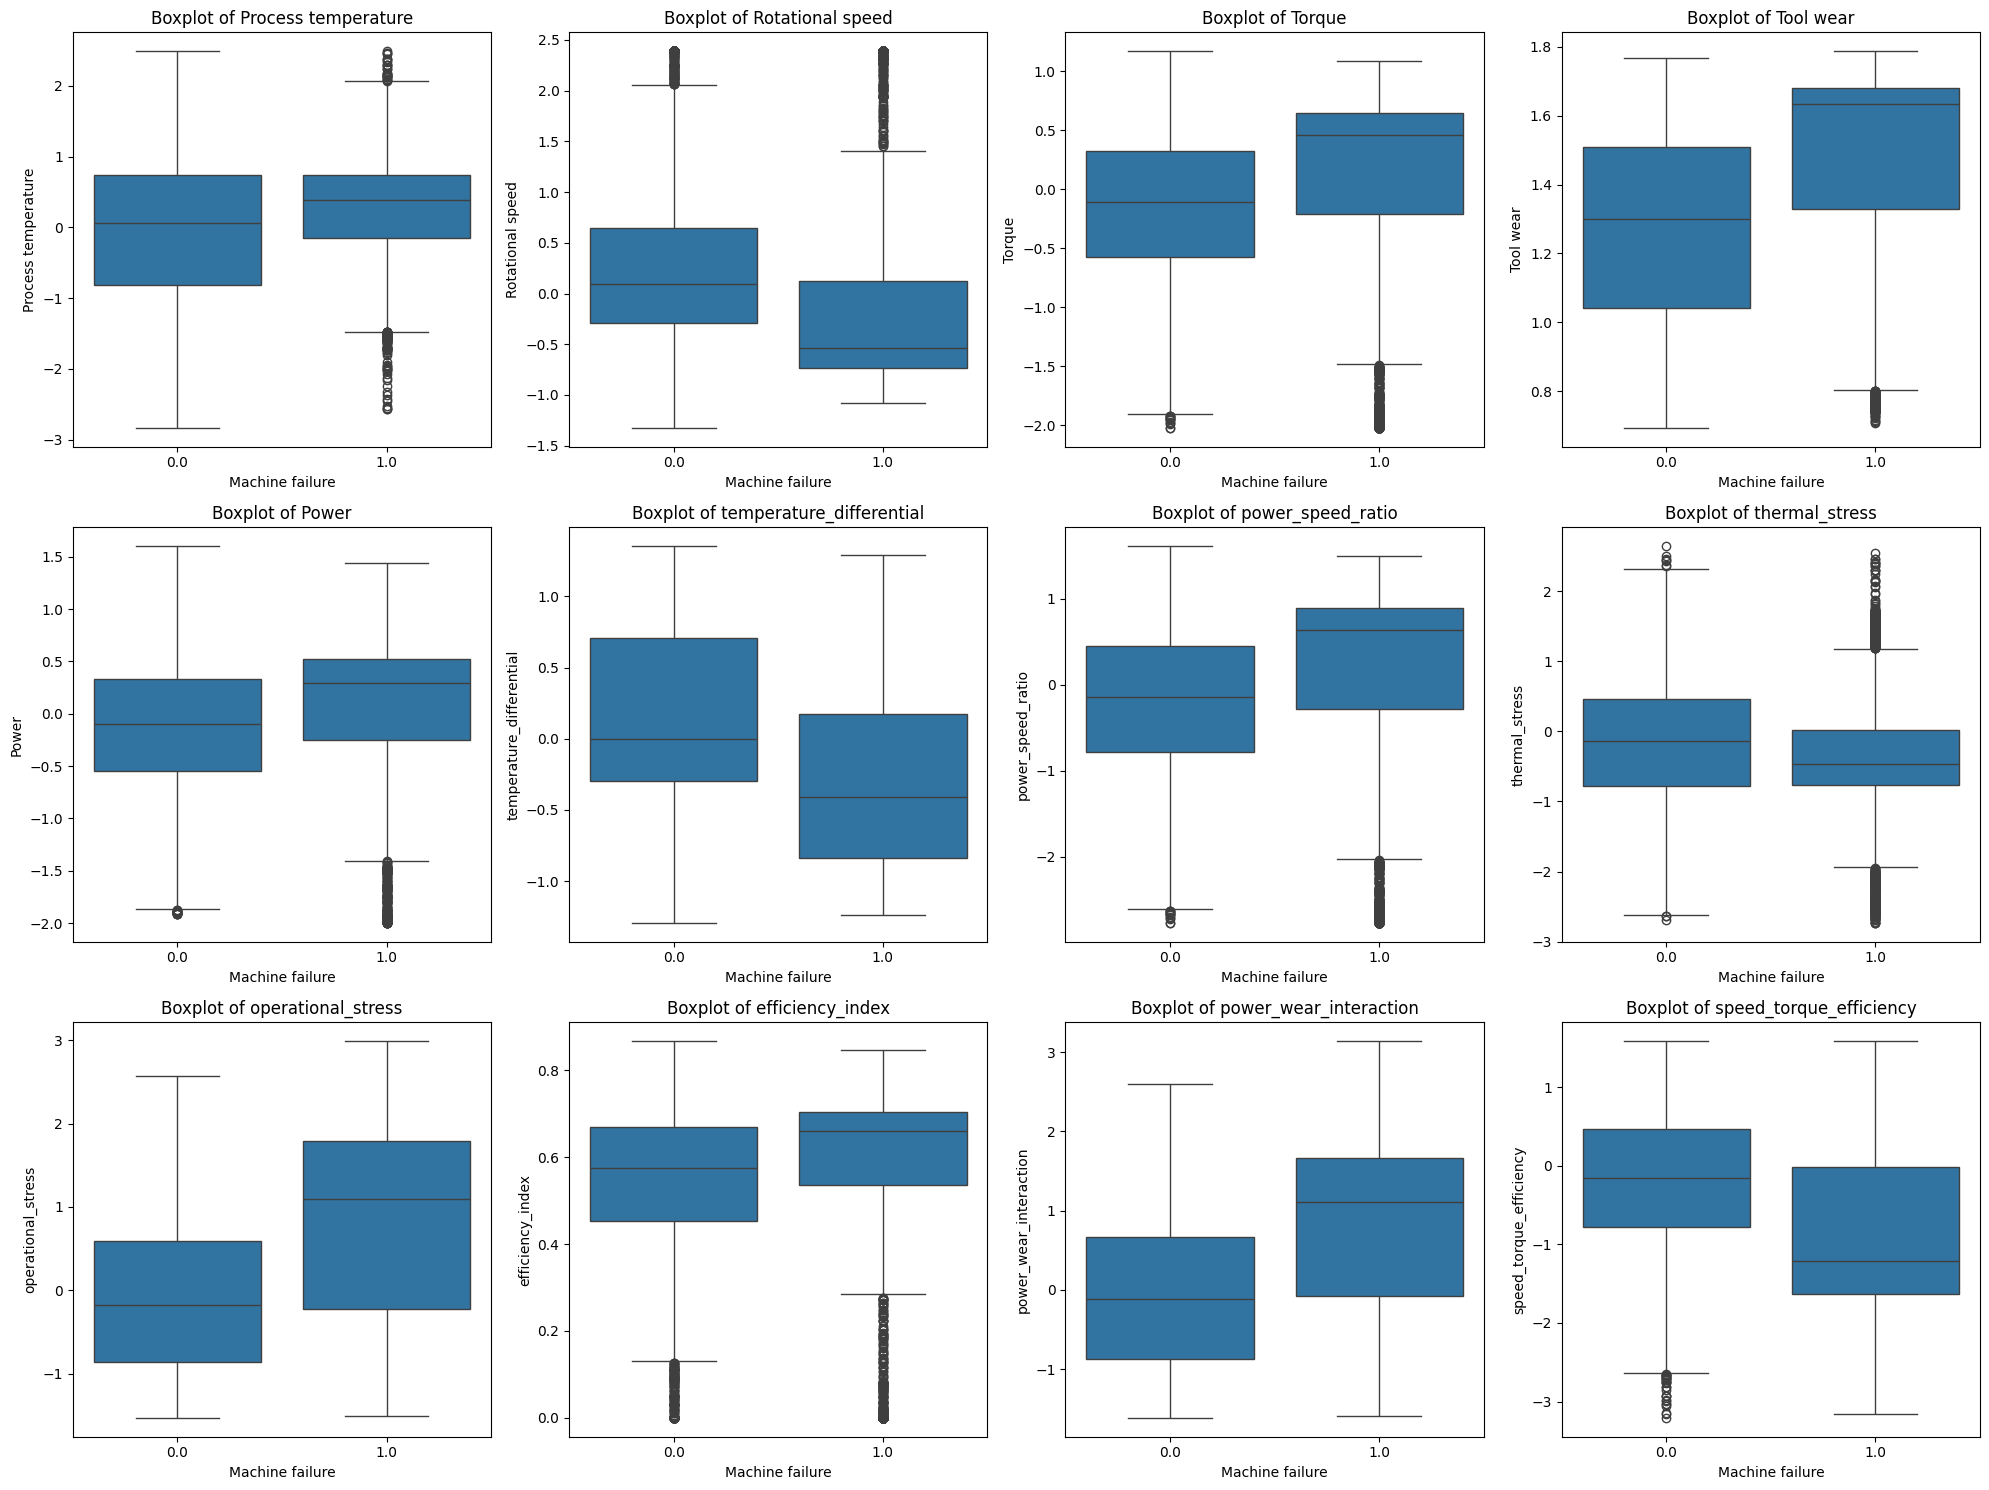

In [34]:
# Ensure Machine failure is treated as a categorical variable and select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Machine failure')

# Determine layout
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x="Machine failure", y=col, data=df, ax=ax[i // n_cols][i % n_cols])
    ax[i // n_cols][i % n_cols].set_title(f"Boxplot of {col}")

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(ax[j // n_cols][j % n_cols])

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Box and Whisker Plots'}, ylabel='Value'>

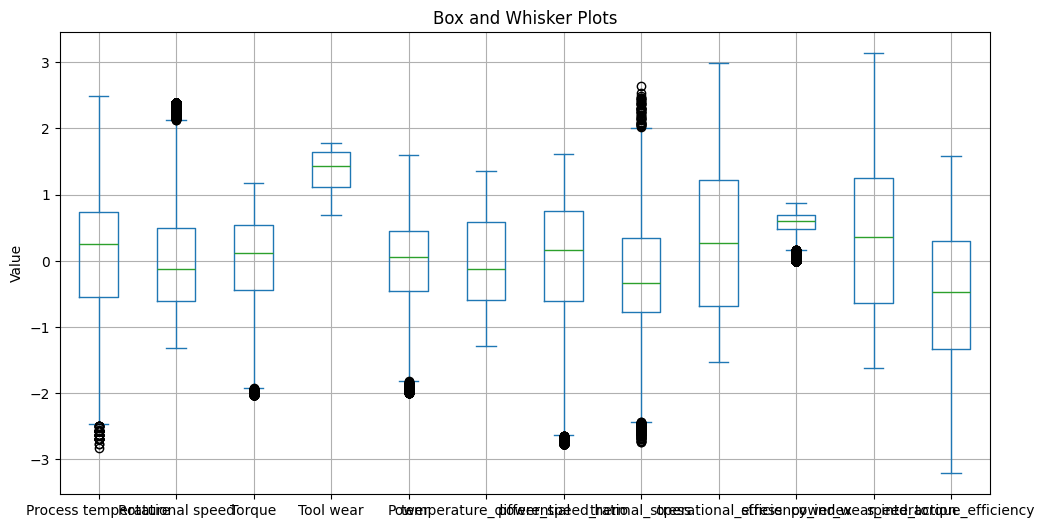

In [35]:
plot_columns = [col for col in df.columns if col not in excluded_columns]
df[plot_columns].plot(kind='box', figsize=(12, 6), title='Box and Whisker Plots', ylabel='Value', grid=True)

<Axes: >

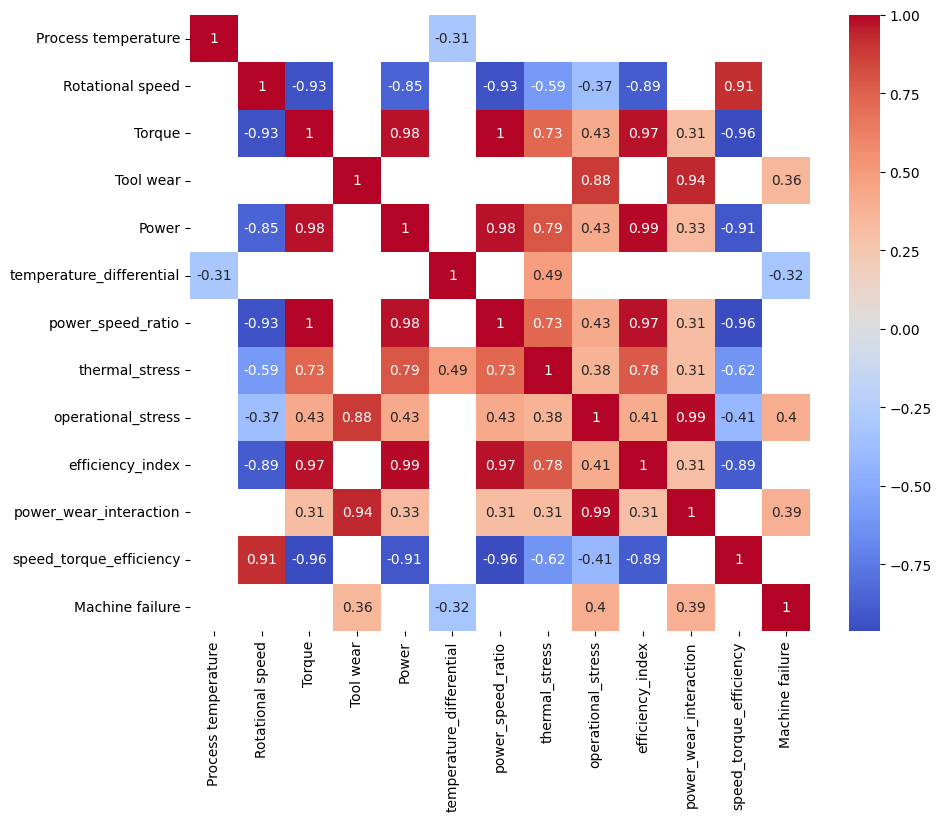

In [36]:
# There are strongly correlated features
threshold = 0.3
correlation = df.corr()
matrix = correlation.where((abs(correlation) >= threshold)).isna()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, mask=matrix)

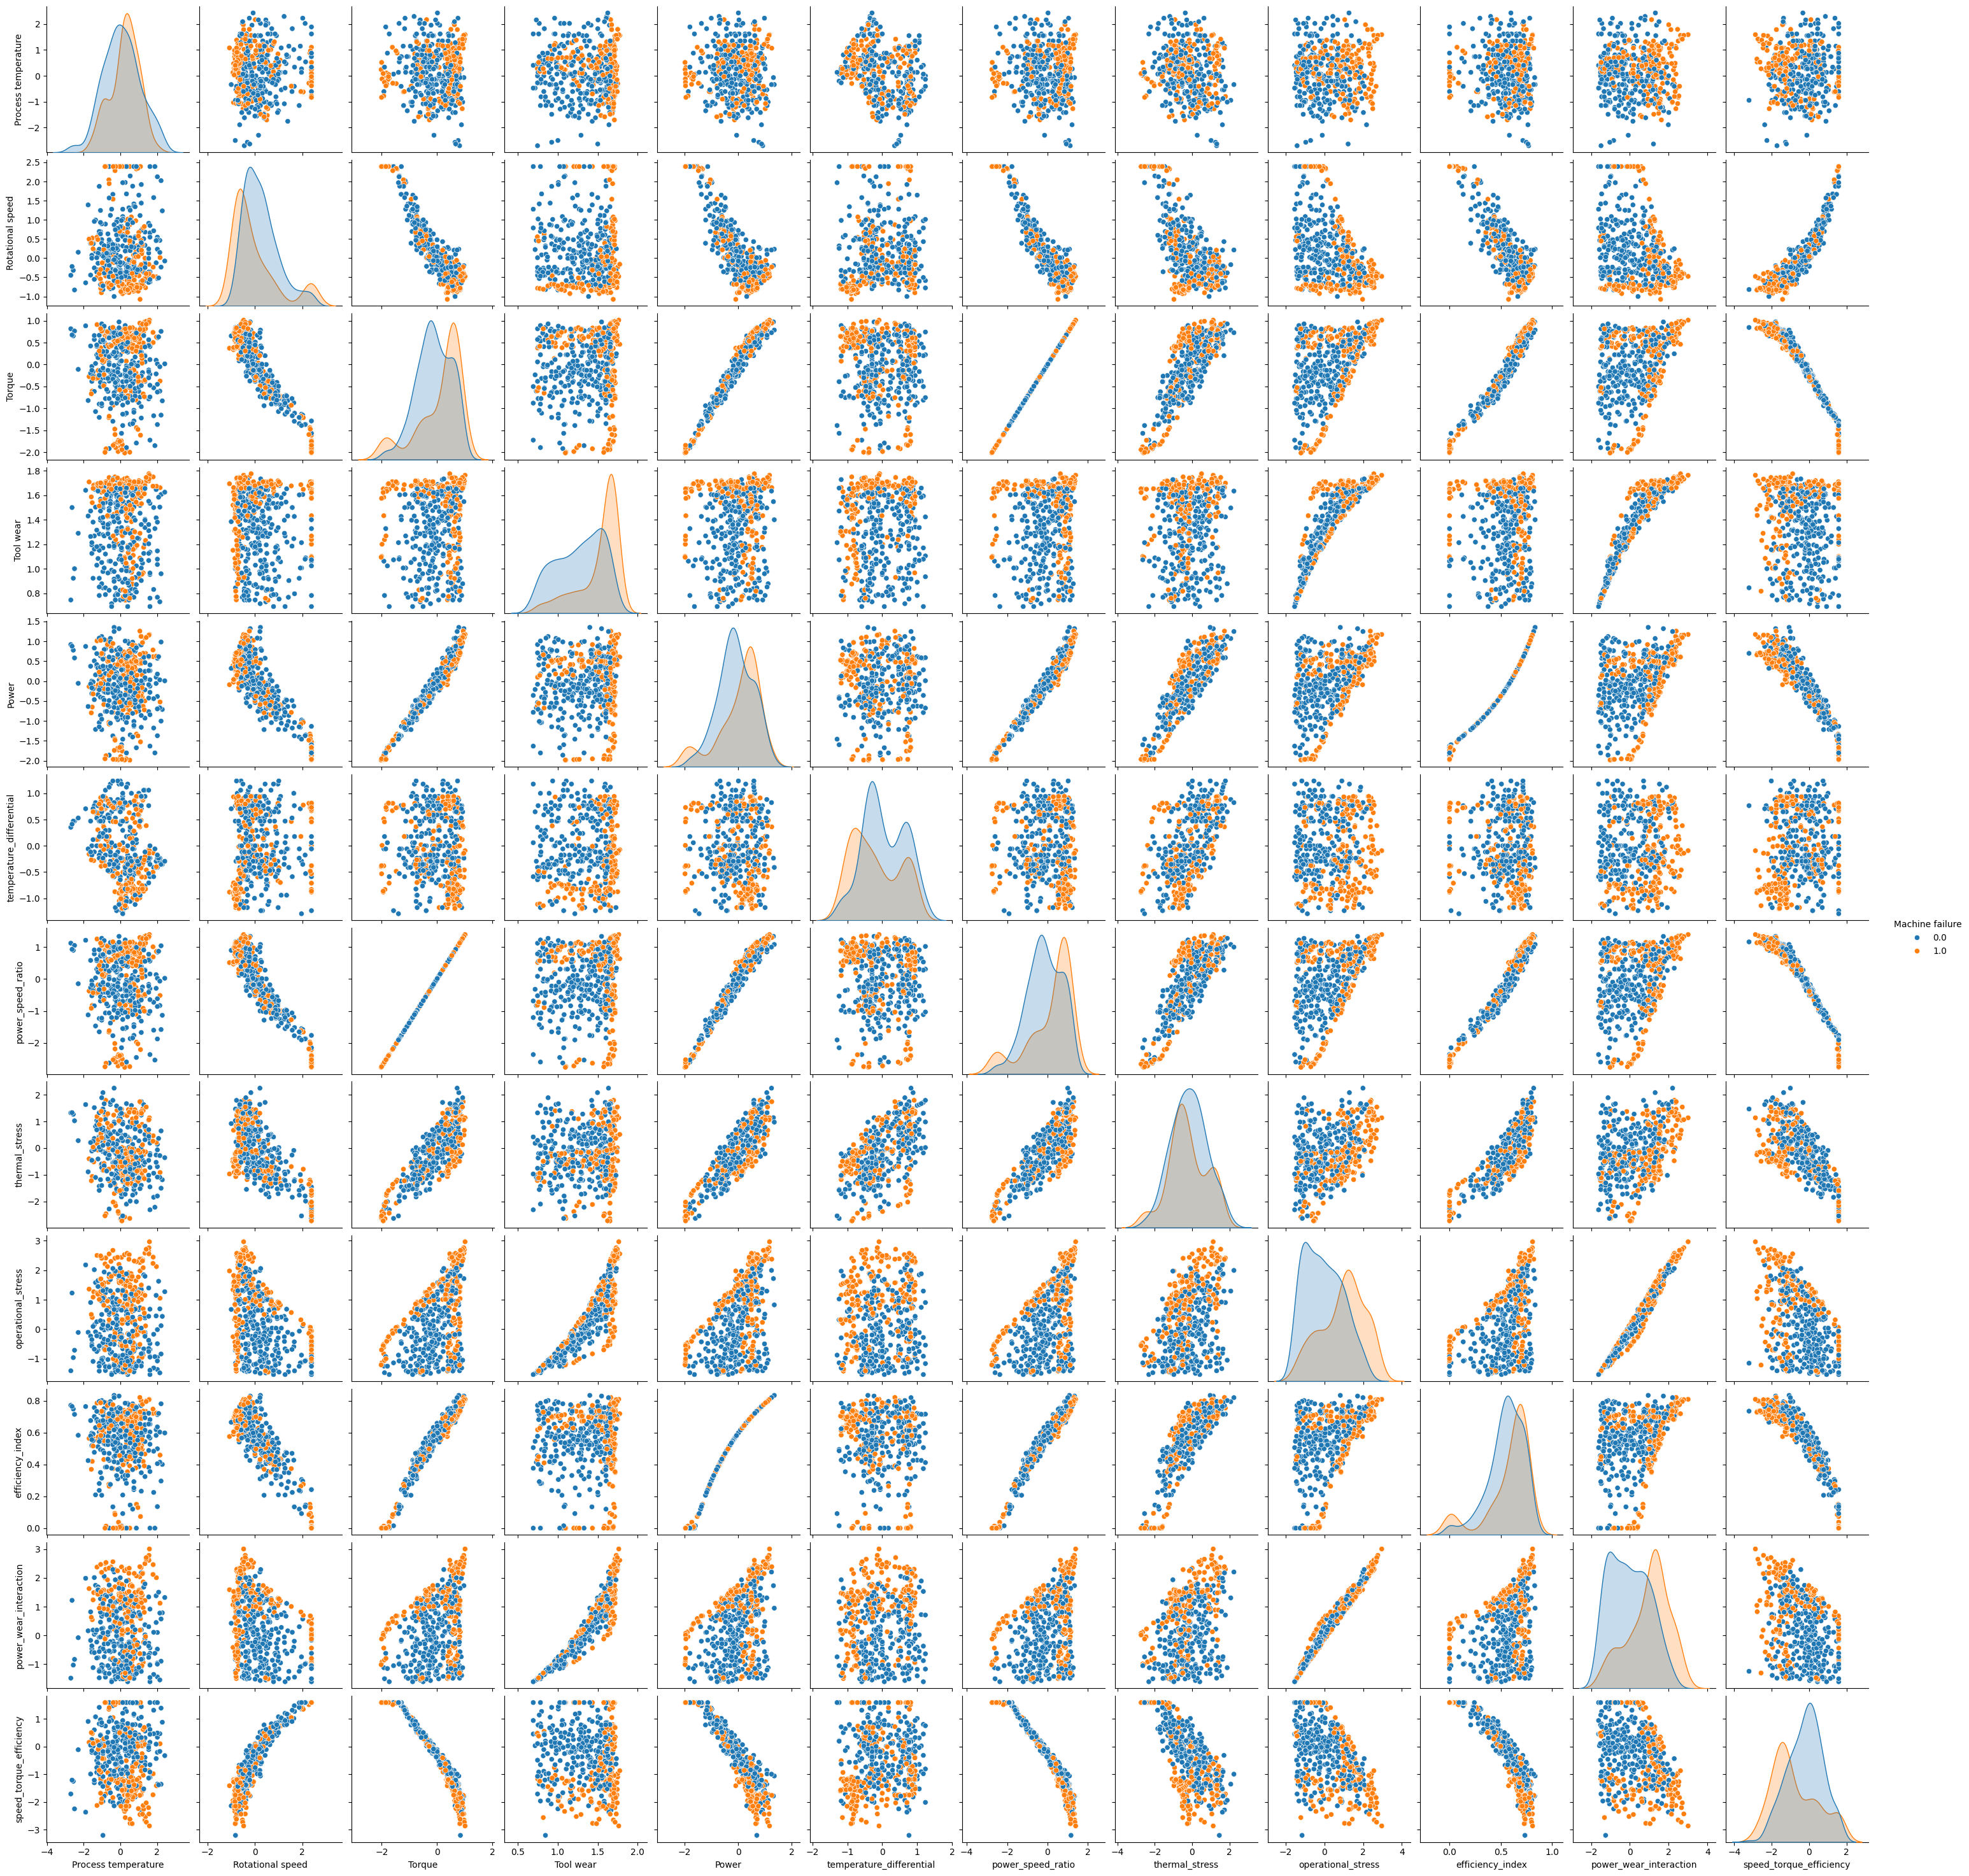

In [37]:
sns.pairplot(df.sample(frac=0.05), hue='Machine failure')

<Axes: >

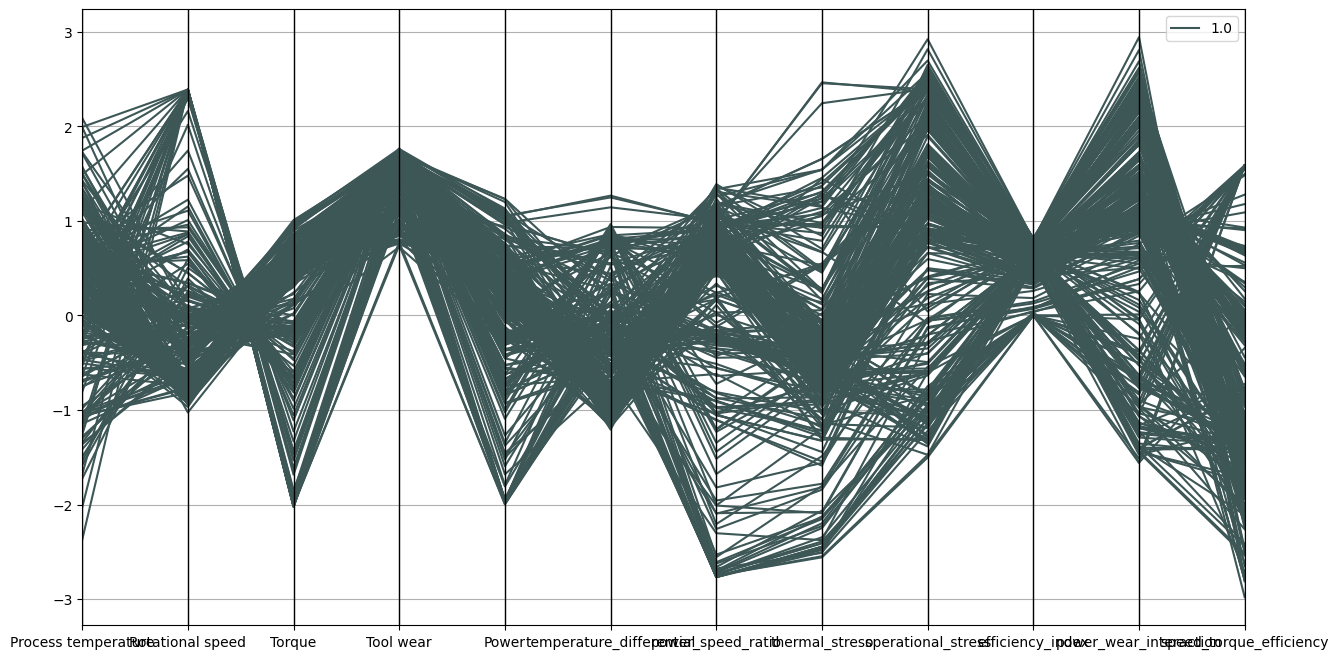

In [38]:
sample = df.sort_values(by=['Machine failure'], ascending=False).head(300)

plt.figure(figsize=(15,8))
pd.plotting.parallel_coordinates(sample, 'Machine failure', color=('#3D5656', '#68B984', '#FED049'))

In [ ]:
df_profile = pdpf.ProfileReport(df)
df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]